<a href="https://colab.research.google.com/github/SaiTeja4239/Pytorch1/blob/main/Pytorch_Workflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch workflow
###In this module were going to cover a standard PyTorch workflow (it can be chopped and changed as necessary but it covers the main outline of steps).



In [243]:
what_were_covering={1:'Data (prepare and load)',
                     2:' bulid model',
                     3:'fitting the model to data (training)',
                     4:' making predictions and evaluating a model(inference)',
                     5:'Saving and loading a model',
                     6:'putting it all together'}
what_were_covering

{1: 'Data (prepare and load)',
 2: ' bulid model',
 3: 'fitting the model to data (training)',
 4: ' making predictions and evaluating a model(inference)',
 5: 'Saving and loading a model',
 6: 'putting it all together'}

In [244]:
import torch
from torch import nn # nn contains all pytorch buliding blocks for neural networks:- https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt
# check pytorch version
torch.__version__


'2.1.0+cu121'

# Data (preparing and loading)
data can be almost anything.. in machine learning.
*   Excel spreadsheet
*   Images of any kind

*   Videos
*   Audio like songs or podcasts
*   DNA
*   Text
Machine learning is game of two parts:

1.   Get data into a numerical represention
2.   Build a model to learn patterns in that numerical representation

we will use a regression formula to make a Straight line with its known parameters









In [245]:
#create *known parameters
weight=0.7
bias=0.3
# create
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10],len(x),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [246]:
len(x),len(y)

(50, 50)

### splitting data into training and test (one of the most important concepts in machine learning in general)

In [247]:
#create  a train/test split
train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

this is where the data Explorer's motto comes in!

"Visualize,visualize!"

In [248]:
def plot_predictions(train_data=x_train,train_labels=y_train,
                     test_data=x_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  #Are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  #show the legend
  plt.legend(prop={"size": 14});


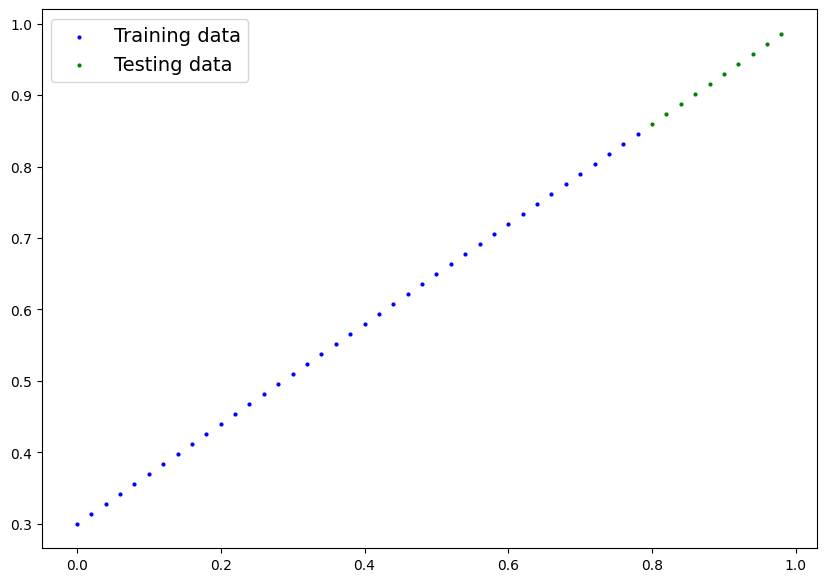

In [249]:
plot_predictions();

#2. Build model

our first PyTorch model!

Our model does:

*   start with random values(weight & bias)
*   Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1.   Gradient Descent
2.   Backpropagation



In [250]:
from torch import nn
#create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias= nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    #forward method to define the computation in the model
  def forward(self,x: torch.Tensor)->torch.Tensor: # x is the input data
    return self.weights*x+self.bias # this is the linear regression

### PyTorch model buliding essentials
*   torch.nn- contains all of the buliding for computational graphs
*   torch.nn.Parameter - What parameter should our model try and learn, often a Pytorch layer from torch.nn will set these for us

*   torch.nn.Module - the base class for all neural network modules,if you subclass, it you should overwrite forward()
*   torch.optim - this where the optimizers in pytorch live, they will help with gradient Descent


*   def Forward()- all nn.Module subclass require you to overwrite forward(). this method defines what happens in the forward computation

In [251]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

# Checking the contents of our PyTorch model
we have to check our model parameters or what's inside our model using .parameters()

In [252]:
#create a random seed
torch.manual_seed(42)
#create an instance of the model (this is a subclass of nn.module)
model_0=LinearRegressionModel()
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [253]:
# list the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [254]:
weight,bias

(0.7, 0.3)

### Making predictions using torch.inference_mode()
To check this we can pass it the test data `X_test` to see how closely it predicts `y_test`.

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined.


In [255]:
y_pred= model_0(x_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [256]:
# make predictions with model
with torch.inference_mode():
  y_pred = model_0(x_test)
# we can also do something
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [257]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

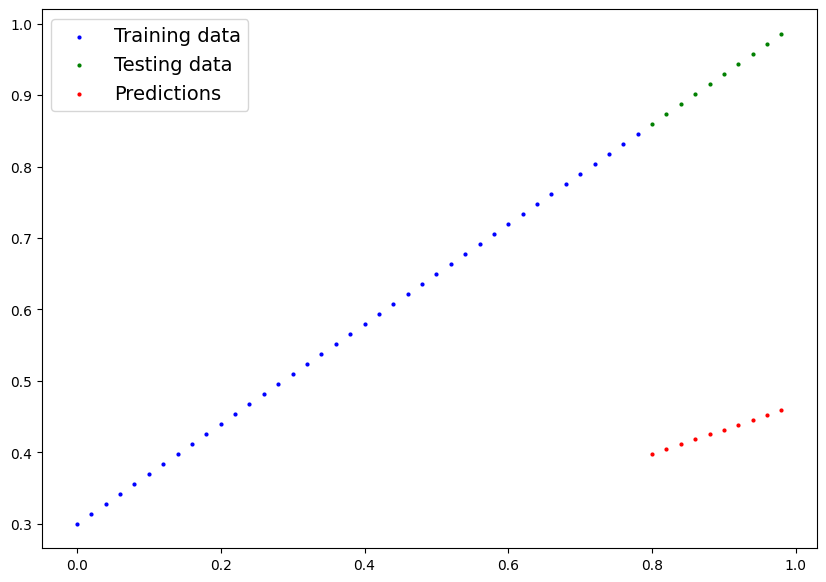

In [258]:
plot_predictions(predictions=y_pred)

###3.Train the model
the whole idea of the training for a model to move from some unknown parameters(these may be random) to some known parameters.

Or in other words from a poor representation of the data to better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function

**Loss function**: A function to measure how wrong your moddel's predictions are to the ideal outputs, lower is better.

**Optimizer**: Takes into an account the loss of a model and adjusts the model's parameters(e.g weight & bias)

In [259]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [260]:
# checks about our models parameter's (a paramaeter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [261]:
# setup a loss optimizer
loss_fn= nn.L1Loss()
#setup an optimizer (stochastic gradient descent)
optimizer= torch.optim.SGD(params=model_0.parameters(),lr=0.01)# lr- learning rate-> possibly the most important

### Buliding a training loop(and testing loop) in PyTorch
A couple of things we need in a training loop:
1.   Loop through the data
2.   Forward pass(this involves data moving through our model's 'forward()' functions) to make predictions on data - also called forward propagation
1.   calculate the loss(compare forward pass prediticions to ground truth lables)
2.   Optimizer zero grad
1.   Loss backward - move backwards through to calculate the gradients of each of the parameters of our model with respect to loss (**back prooagation**)
2.   Optimizer step- Use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)







In [262]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [263]:
x_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [264]:
torch.manual_seed(42)
# epoch is one loop through the data..
epochs =200
#track different values
epoch_count=[]
loss_values=[]
test_loss_values=[]
### training
# 0 loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in Pytorch Sets all parameters that require gradients to require gradients
  # 1.Forward pass
  y_pred=model_0(x_train)
  # calcuate the loss
  loss = loss_fn(y_pred,y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  # 5. Step the optimizer (perform gradient descenmt)
  optimizer.step()
  ### testing
  model_0.eval() #turns off gradient tracking
  with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss:{loss} | Test loss:{test_loss}")

    print(model_0.state_dict())

Epoch: 0 | Loss:0.31288138031959534 | Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss:0.1976713240146637 | Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss:0.08908725529909134 | Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss:0.053148526698350906 | Test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss:0.04543796554207802 | Test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss:0.04167863354086876 | Test loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss:0.03818932920694351 | Test loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 7

In [265]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [266]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

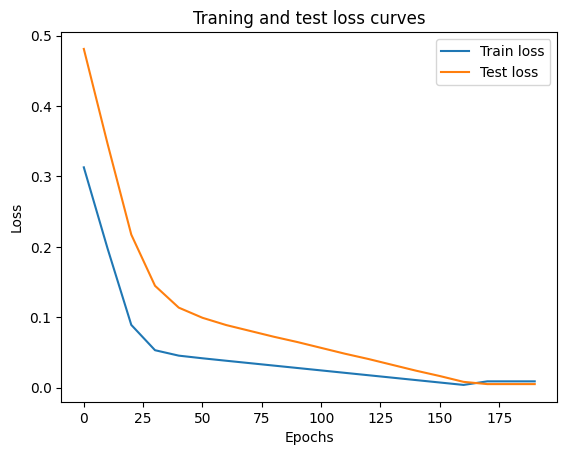

In [267]:
#plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Traning and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [268]:
with torch.inference_mode():
  y_pred_new=model_0(x_test)

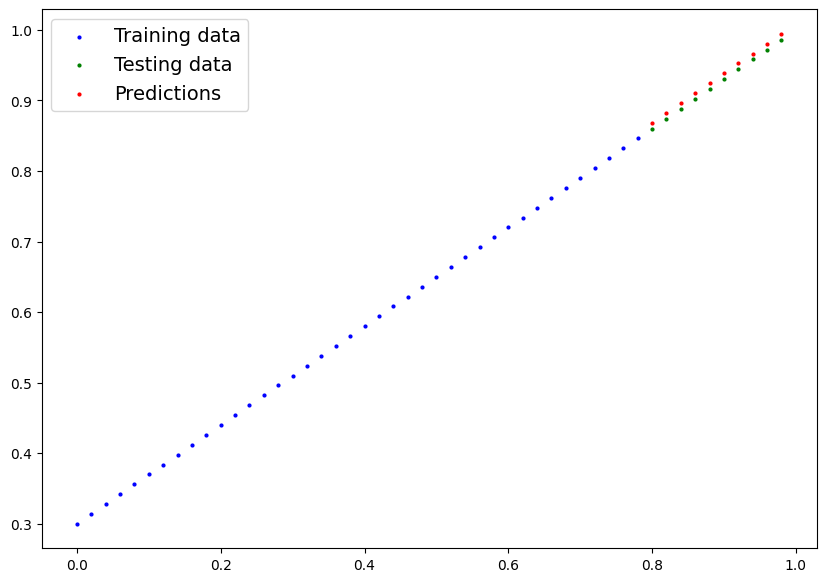

In [269]:
plot_predictions(predictions=y_pred_new)

In [270]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

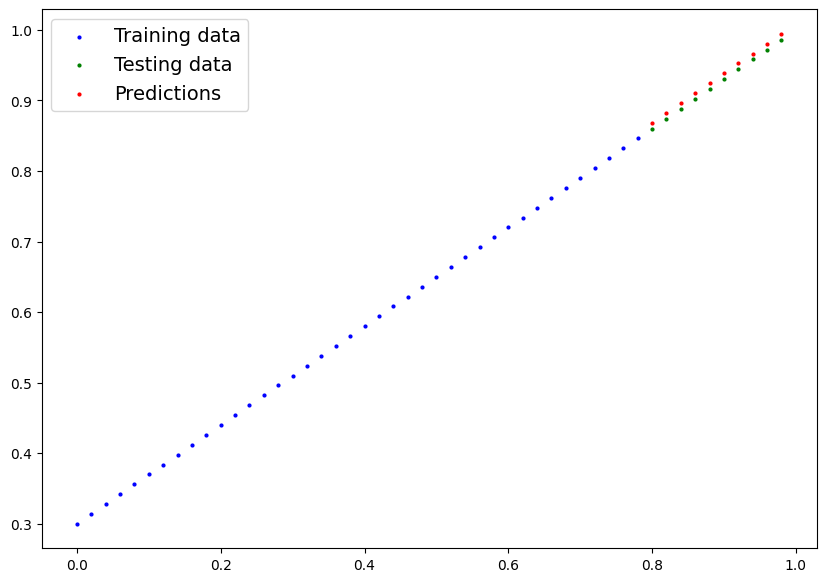

In [271]:
plot_predictions(predictions=y_pred_new)

Saving a model in PyTorch

there are three main methods

1.torch.save()

2.torch.load()

3.torch.nn.Module.load_state_dict()

In [272]:
#saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [273]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Feb 14 07:53 models/01_pytorch_workflow_model_0.pth


In [274]:

# To load in saved state_dict we have to instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [275]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [276]:
# To make predictions with our model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [277]:
#compare loaded model preds with original model preds
y_pred_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [278]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(x_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

Putting it all together

In [279]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.1.0+cu121'

In [280]:

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


Data

In [281]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [282]:

# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

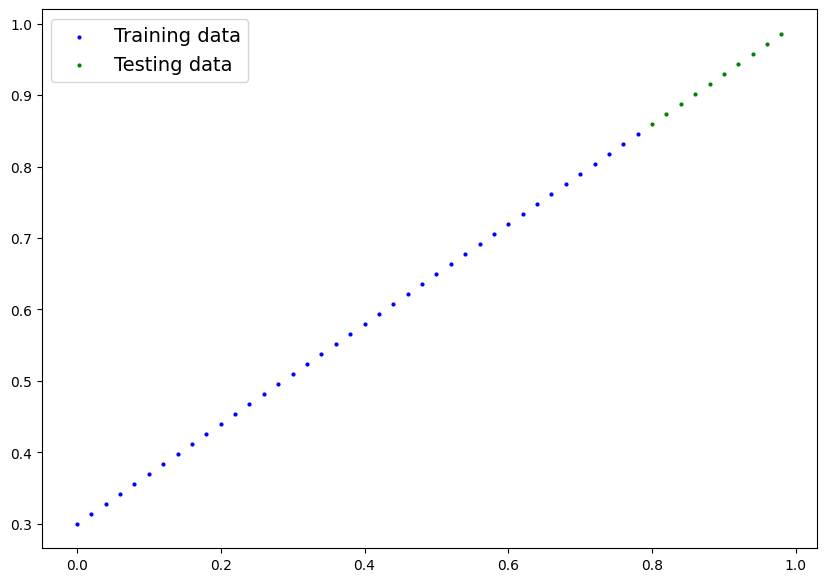

In [283]:
plot_predictions(X_train, y_train, X_test, y_test)

Building a PyTorch linear model

In [284]:
# create a linear model by Subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [285]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [286]:
# Set model to use the target  device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

Training

for training we need:

loss function

optimizer

training loop

testing loop

In [287]:
#setup loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [288]:
#lets write a training loop
torch.manual_seed(42)


epochs =  200

# Put data on the available device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Train loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Train loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Train loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Train loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Train loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Train loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Train loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Train loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Train loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Train loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Train loss: 0.0012645035749301314 | Test loss: 0.01380180753

In [289]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [290]:
weight,bias

(0.7, 0.3)

Making and evaluating predictions

In [291]:
#Turn model into evaluation mode
model_1.eval()
#make predictions on the test data
with torch.inference_mode():
  y_preds=model_1(x_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

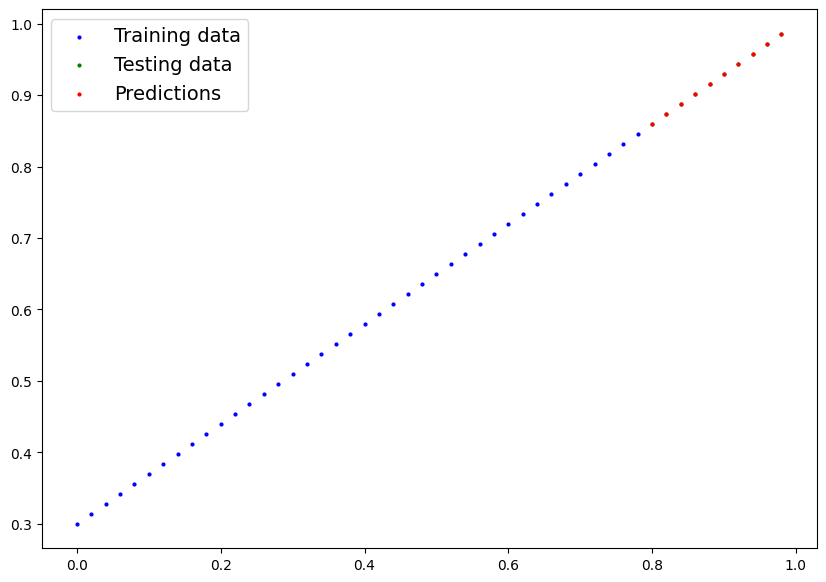

In [292]:
#check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

 Saving and loading a model

In [293]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [294]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [295]:
#load a PyTorch model
# create a new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [296]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [297]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [298]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])